# Atmospheric Phase Screens

First we import the `ceo` module.

In [1]:
import sys
import numpy as np
import math
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Then a `Source` object is created. You must specify the photometric bandwidth.
The zenith and azimuth angles and the source height are optional parameters set by default to 0,0 and $\infty$, respectively.
The wavefront shape is also optional set to (0,0) per default, meaning that the source won't have a wavefront.

In [2]:
n = 64
src = ceo.Source("K",resolution=(n,n))

An `Atmosphere` object is created by specifying first the $r_0$ and $L_0$, the the optional number of layers, layer altitudes, fractional powers, wind speeds and directions.
Here a single atmospheric layer at the ground is created.

In [3]:
atm = ceo.Atmosphere(0.15,30)
#atm = ceo.GmtAtmosphere(0.15,30)

A phase screen is computed by passing the source object, the number of sources in the source object, the sampling step and number in the X and y directions and the time delay.

In [4]:
atm.get_phase_screen(src,0.1,n,0.1,n,0.0)

The phase screen is written in the phase attribute of the source object.
The phase attribute is a `cuFloatArray` object that contains a pointer to the phase screen on the device.
To copy the data to the host, simply call the `host` method of the `cuFloatArray` object.

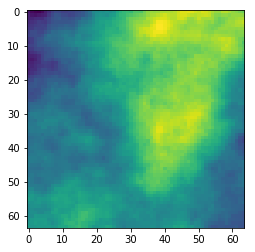

In [5]:
imshow(src.phase.host(units='micron'))